In [115]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [116]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [117]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/Mouse_metadata.csv"
clinical_trial_data_to_load = "data/Study_results.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
tumor_df = pd.merge(clinical_df, mouse_df, on ='Mouse ID', how='inner')

# Display the data table for preview
tumor_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [118]:
# rename columns
tumor_df.rename(columns={'Mouse ID': 'MouseID', 'Tumor Volume (mm3)': 'Volume', 'Metastatic Sites':'Sites', 'Drug Regimen': 'Drug', 'Age_months': 'Age', 'Weight (g)': 'Weight'}, inplace=True)
tumor_df.head()

,MouseID,Timepoint,Volume,Sites,Drug,Sex,Age,Weight
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [119]:
number_mice = len(tumor_df['MouseID'].unique())
print(f"The number of mice in the dataset is {number_mice}.")

The number of mice in the dataset is 249.


## Check for duplicated data

In [120]:
# only one measurement per mouse per time point should be possible
# check for duplicates and display all repeated measurements
repeated_mouse_id = tumor_df[tumor_df.duplicated(subset=['MouseID', 'Timepoint'], keep=False) == True]
repeated_mouse_id

,MouseID,Timepoint,Volume,Sites,Drug,Sex,Age,Weight
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [121]:
# check for misssing data
tumor_grouped = tumor_df.groupby(['MouseID', 'Drug']).mean()
tumor_grouped

,,Timepoint,Volume,Sites,Age,Weight
MouseID,Drug,,,,,
a203,Infubinol,22.5,56.312708,1.100000,20.0,23.0
a251,Infubinol,22.5,55.237095,0.800000,21.0,25.0
a262,Placebo,22.5,58.611631,2.300000,17.0,29.0
a275,Ceftamin,22.5,52.770965,1.200000,20.0,28.0
a366,Stelasyn,15.0,54.639906,0.142857,16.0,29.0
...,...,...,...,...,...,...
z435,Propriva,5.0,46.942214,0.000000,12.0,26.0
z578,Ramicane,22.5,38.411510,0.000000,11.0,16.0
z581,Infubinol,22.5,53.979584,2.000000,24.0,25.0


### Analsysis Check
*  Note that the original dataframe has 249 mice and this aggregated frame has 249 so it doesn't look like there are mismatches by drug.
*  The duplicated mouse id's above show consistent drug labels.

In [122]:
# Double check that there are no duplicated MouseID by resetting the index and checking the MouseID column for duplicates
find_duplicated_mouseID_from_grouped_data = tumor_grouped.reset_index()    
find_duplicated_mouseID_from_grouped_data[find_duplicated_mouseID_from_grouped_data['MouseID'].duplicated(keep=False)]

,MouseID,Drug,Timepoint,Volume,Sites,Age,Weight


In [126]:
# Looks like it is only g989 that has bad data
# first, remove all g989 and retest
tumor_df.drop(tumor_df[tumor_df['MouseID'] == 'g989'].index, inplace=True)

In [127]:
# check for misssing data
# ignore outputs of timepoint, volume, and sites - meaningless at this point
tumor_grouped = tumor_df.groupby(['MouseID', 'Drug']).mean()
tumor_grouped

,,Timepoint,Volume,Sites,Age,Weight
MouseID,Drug,,,,,
a203,Infubinol,22.5,56.312708,1.100000,20.0,23.0
a251,Infubinol,22.5,55.237095,0.800000,21.0,25.0
a262,Placebo,22.5,58.611631,2.300000,17.0,29.0
a275,Ceftamin,22.5,52.770965,1.200000,20.0,28.0
a366,Stelasyn,15.0,54.639906,0.142857,16.0,29.0
...,...,...,...,...,...,...
z435,Propriva,5.0,46.942214,0.000000,12.0,26.0
z578,Ramicane,22.5,38.411510,0.000000,11.0,16.0
z581,Infubinol,22.5,53.979584,2.000000,24.0,25.0


### Analysis Check  
I choose to remove 'g989' because the data must be faulty.
tumor_df now shows 248 unique mice


In [128]:
# check data types
tumor_df.dtypes

MouseID       object
Timepoint      int64
Volume       float64
Sites          int64
Drug          object
Sex           object
Age            int64
Weight         int64
dtype: object

In [129]:
# chek for mouse given more than one drug
tumor_df.describe()

,Timepoint,Volume,Sites,Age,Weight
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


### Analysis Check  
* Data types looks fine  
* timepoint, tumor volume, sites, and weight min/max values make sense  
* Not sure if the age makes sense - the range is one month to 24 months at the start of the study
* Nothing else stands out   

## Baseline data (timepoint = 0)

In [130]:
baseline_df = tumor_df[tumor_df['Timepoint'] == 0] 
baseline_df

,MouseID,Timepoint,Volume,Sites,Drug,Sex,Age,Weight
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [161]:
stat_table = baseline_df.describe()
stat_table

,Timepoint,Volume,Sites,Age,Weight
count,248.0,248.0,248.0,248.000000,248.000000
mean,0.0,45.0,0.0,12.697581,26.116935
std,0.0,0.0,0.0,7.224093,3.704472
min,0.0,45.0,0.0,1.000000,15.000000
25%,0.0,45.0,0.0,6.000000,25.000000
50%,0.0,45.0,0.0,13.000000,27.000000
75%,0.0,45.0,0.0,19.000000,29.000000
max,0.0,45.0,0.0,24.000000,30.000000


In [168]:
# Alternate way of accessing key stats
print(f"The average weight at the start of the study was {round(stat_table.Weight['mean'],2)} grams with a standard deviation of {round(stat_table.Weight['std'],2)}.")

The average weight at the start of the study was 26.12 grams with a standard deviation of 3.7.


In [173]:
# Alternate way of accessing key stats
# Note:  using dot notation in the print statement will not work when extracting the data; must use ['xxxx']
average_weight = baseline_df['Weight'].agg(func=['mean', 'std', 'min', 'max'])
print(f"The average weight at the start of the study was {round(average_weight['mean'],2)} grams with a standard deviation of {round(average_weight['std'],2)}.")

The average weight at the start of the study was 26.12 grams with a standard deviation of 3.7.


In [160]:
# Alternate way of calculating key stats and accessing them.
average_weight = baseline_df['Weight'].agg(func=['mean', 'std', 'min', 'max'])
print(f"The average weight at the start of the study was {round(average_weight.values[0],2)} grams with a standard deviation of {round(average_weight.values[1],2)}.")

The average weight at the start of the study was 26.12 grams with a standard deviation of 3.7.


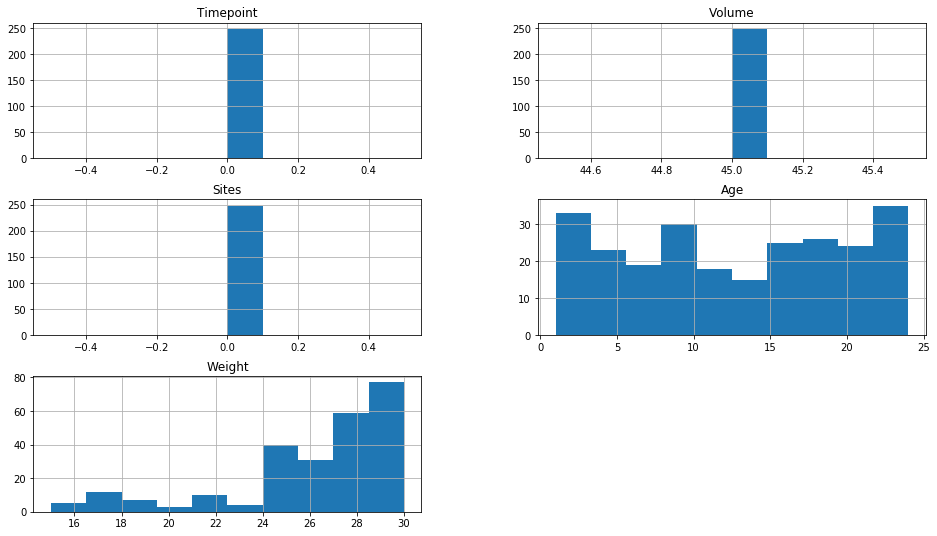

In [157]:
# Univariate Analysis
# answering - how is each characteristic distributed
baseline_df.hist(bins=10, figsize=(16,9));

### Analysis Check
*  Timepoint data is all zeros as expected.
*  Number of metastitic sites (cancer spread from tumor) is zero
*  Tumor volume is 45 mm3 which makes sense if the mice had been innoculated with cancer cells
*  Weight and age of the mice vary 

(0, 35)

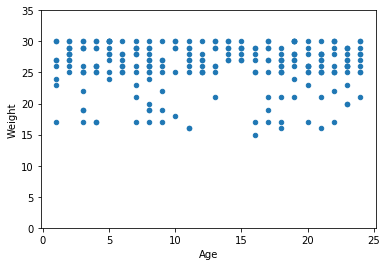

In [216]:
# Bivariate Analysis
baseline_df.plot(kind='scatter', x='Age', y='Weight')
plt.ylim(0, 35)

(0, 35)

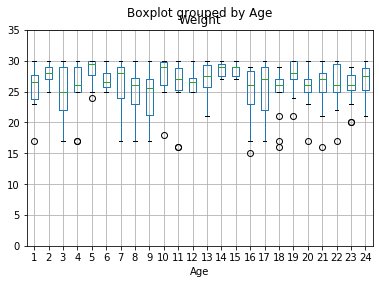

In [214]:
baseline_df.boxplot(column='Weight', by='Age');
plt.ylim(0, 35)

(0, 35)

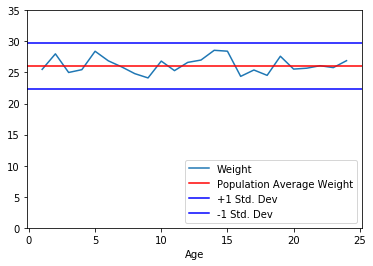

In [236]:
# plot mean weight versus age
baseline_df.groupby('Age').mean().reset_index().plot(kind='line', x='Age', y='Weight')

# average weight from above
avg_weight = average_weight['mean']   
plt.axhline(y=avg_weight, color='r', linestyle='-', label="Population Average Weight")

# standard deviation 
std_weight = average_weight['std']
plt.axhline(y=avg_weight + std_weight, color='b', linestyle='-', label="+1 Std. Dev")
plt.axhline(y=avg_weight - std_weight, color='b', linestyle='-', label="-1 Std. Dev")
plt.legend(loc='lower right')
plt.ylim(0, 35)

In [178]:
# does not include rightmost edge
bins = pd.cut(baseline_df['Age'], bins=5, labels=['1-4.99','5-9.99','10-14.99','15-19.99','20-24.99']) 
baseline_df['Age_Group']=bins
baseline_df.head()

,MouseID,Timepoint,Volume,Sites,Drug,Sex,Age,Weight,Age_Group
0,b128,0,45.0,0,Capomulin,Female,9,22,5-9.99
10,f932,0,45.0,0,Ketapril,Male,15,29,15-19.99
11,g107,0,45.0,0,Ketapril,Female,2,29,1-4.99
19,a457,0,45.0,0,Ketapril,Female,11,30,10-14.99
22,c819,0,45.0,0,Ketapril,Male,21,25,20-24.99


In [202]:
age_group_baseline_df = baseline_df.groupby('Age_Group')['Age', 'Weight'].mean()
age_group_baseline_df

,Age,Weight
Age_Group,,
1-4.99,3.125000,26.535714
5-9.99,7.857143,25.530612
10-14.99,12.363636,26.727273
15-19.99,17.333333,26.000000
20-24.99,21.983051,25.966102


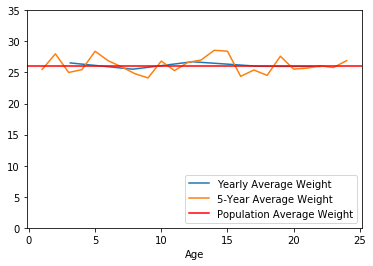

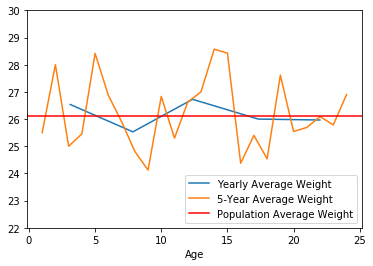

In [233]:
for i in range(2):
    # using the variable ax for single a Axes
    fig, ax = plt.subplots()

    # plot grouped mean weight versus age (groups per 5 years)
    age_group_baseline_df.plot(kind='line', x='Age', y='Weight', ax=ax, label="Yearly Average Weight")

    # plot mean weight versus age
    baseline_df.groupby('Age').mean().reset_index().plot(kind='line', x='Age', y='Weight', ax=ax, label="5-Year Average Weight")

    # horizontal line representing mean weight for all mice
    plt.axhline(y=avg_weight, color='r', linestyle='-', label="Population Average Weight")
    if (i ==0):
        plt.ylim(0, 35)
    else: 
        plt.ylim(22,30)
    
    ax.legend(loc='lower right')

### Analsysis check
*  Age and Weight have some variation
*  As indicated by the boxplot, the analysis could also be done by eleminating the outliers; maybe analyze base on mice only above 23 grams 

## Tumor Response to Treatment

In [237]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_df = tumor_df.loc[:, ['Drug', 'Timepoint','Volume']]

#mean_tumor_df.groupby(['Drug', 'Timepoint']).mean()
mean_df2 = mean_tumor_df.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame
mean_df=mean_df2.reset_index()

# Preview DataFrame
mean_df.head()

,Drug,Timepoint,Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [238]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_df = tumor_df.loc[:, ['Drug', 'Timepoint','Volume']]
sem_df = sem_tumor_df.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
sem_df = sem_df.reset_index()

# Preview DataFrame
sem_df.head()


,Drug,Timepoint,Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [239]:
# Minor Data Munging to Re-Format the Data Frames
mean_reformat_df = mean_df.pivot(index='Timepoint', columns='Drug', values='Volume')
sem_reformat_df = sem_df.pivot(index='Timepoint', columns='Drug', values='Volume')

# Preview that Reformatting worked
mean_reformat_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


No handles with labels found to put in legend.


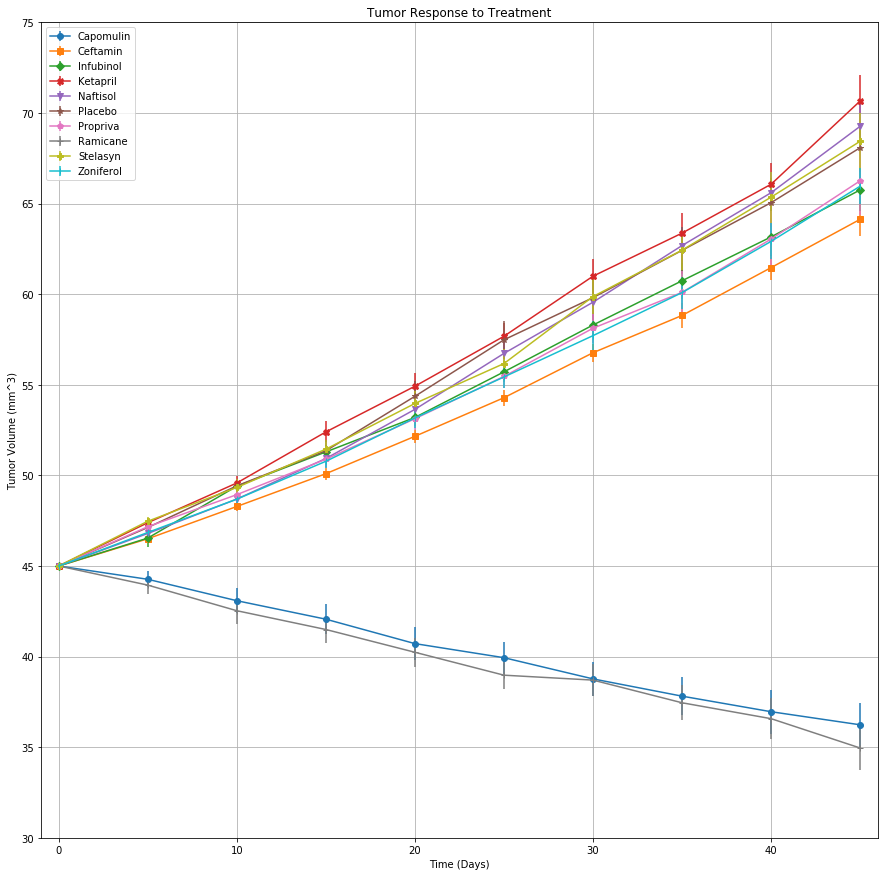

In [241]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=(15,15))
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm^3)')
plt.legend(loc='best')
plt.axis([-1, 46, 30, 75])
plt.grid()
markers=['o', 's', 'D', 'X', 'v', '*', 'p', '+', 'P', '|' ]
time = list(mean_reformat_df.index)
drug_list = list(mean_reformat_df.keys())

for x in drug_list:
    val = mean_reformat_df[x]
    err = sem_reformat_df[x]
    plt.errorbar(time,val,yerr=err, marker=markers[drug_list.index(x)], label=drug_list[drug_list.index(x)])

plt.legend(loc='best');

# Save the Figure

## Metastatic Response to Treatment

In [242]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_df = tumor_df.loc[:, ['Drug', 'Timepoint','Sites']]
met_df2 = mean_met_df.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame
met_df = met_df2.reset_index()

# Preview DataFrame
met_df.head()

,Drug,Timepoint,Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [243]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_df = mean_met_df.loc[:, ['Drug', 'Timepoint','Sites']]
sem_met_df = sem_met_df.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
sem_met_df = sem_met_df.reset_index()

# Preview DataFrame
sem_met_df

,Drug,Timepoint,Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [244]:
# Minor Data Munging to Re-Format the Data Frames
met_reformat_df = met_df.pivot(index='Timepoint', columns='Drug', values='Sites')
sem_met_reformat_df = sem_met_df.pivot(index='Timepoint', columns='Drug', values='Sites')
# Preview that Reformatting worked
sem_met_reformat_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.101543,0.066332,0.093618,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.108588,0.090289,0.131277,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.144749,0.115261,0.163577,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.195180,0.119430,0.222607,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.212990,0.119430,0.232210,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.284268,0.139968,0.243426,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.408248,0.145997,0.255728,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


No handles with labels found to put in legend.


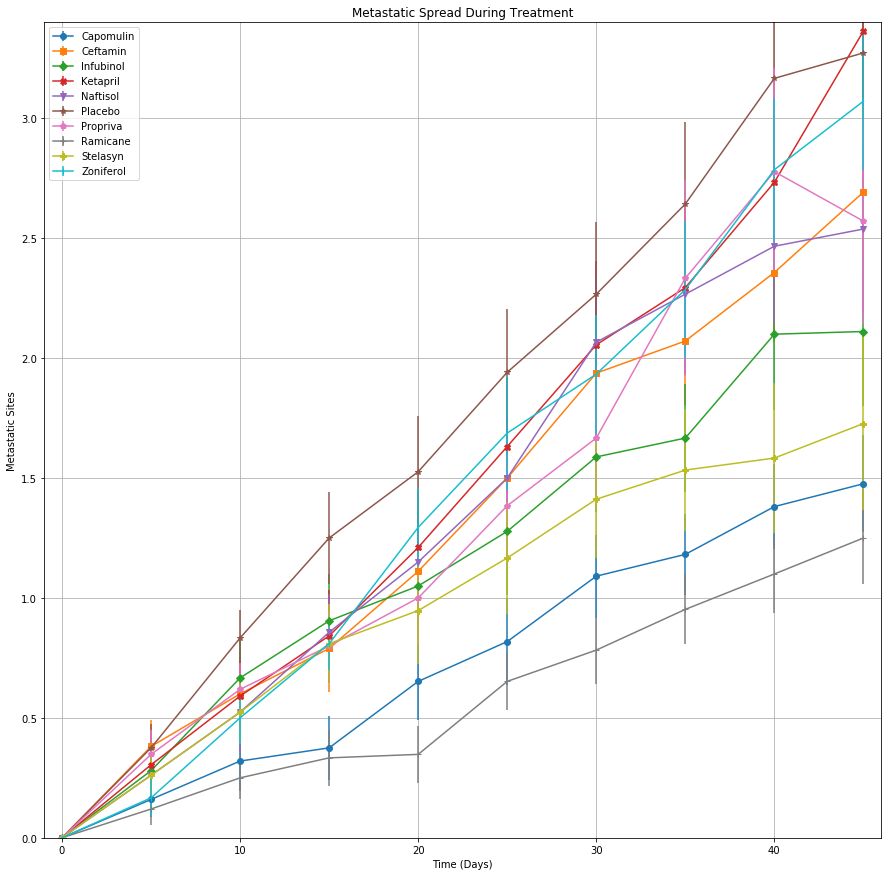

In [245]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=(15,15))
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')
plt.legend(loc='best')
plt.axis([-1, 46, 0, 3.4])
plt.grid()
markers=['o', 's', 'D', 'X', 'v', '*', 'p', '+', 'P', '|' ]
time = list(met_reformat_df.index)
drug_list = list(met_reformat_df.keys())

for x in drug_list:
    val = met_reformat_df[x]
    err = sem_met_reformat_df[x]
    plt.errorbar(time,val,yerr=err, marker=markers[drug_list.index(x)], label=drug_list[drug_list.index(x)])

plt.legend(loc='best')
# Save the Figure
plt.savefig('metastic_line_plot.jpeg')
# Show the Figure
#I'm using the subplots command so it already shows 

## Survival Rates

In [246]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_df = tumor_df.loc[:, ['Drug', 'Timepoint','MouseID']]

#mean_tumor_df.groupby(['Drug', 'Timepoint']).mean()
mice_df2 = mice_df.groupby(['Drug', 'Timepoint']).count()
# Convert to DataFrame
cnt_mice_df = mice_df2.reset_index()
# Preview DataFrame
cnt_mice_df

,Drug,Timepoint,MouseID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [247]:
# Minor Data Munging to Re-Format the Data Frames
mice_reformat_df = cnt_mice_df.pivot(index='Timepoint', columns='Drug', values='MouseID')
# sem_mice_reformat_df = sem_mice_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
# Preview that Reformatting worked
mice_reformat_df
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17
25,22,18,18,19,18,17,13,23,18,16
30,22,16,17,18,15,15,12,23,17,15
35,22,14,12,17,15,14,9,21,15,14
40,21,14,10,15,15,12,9,20,12,14


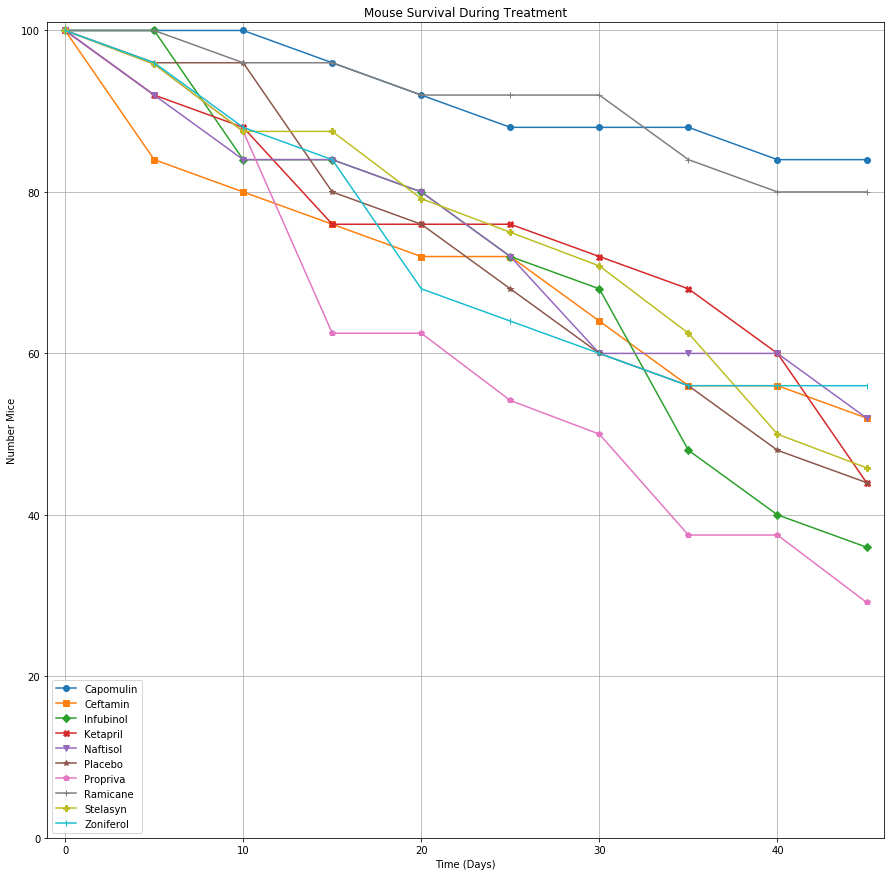

In [249]:
# Generate the Plot (Accounting for percentages)

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Mouse Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Number Mice')
plt.axis([-1, 46, 20, 110])
plt.grid()
markers=['o', 's', 'D', 'X', 'v', '*', 'p', '+', 'P', '|' ]
time = list(mice_reformat_df.index)
drug_list = list(mice_reformat_df.keys())
mice_perc_df = mice_reformat_df   ##This is just to create a new dataframe to write to that is same size & indices

for x in drug_list:
    mice_perc_df[x] = (mice_reformat_df[x]/mice_reformat_df[x][0])*100

for x in drug_list:
    val = mice_perc_df[x]
    plt.plot(time,val, marker=markers[drug_list.index(x)], label=drug_list[drug_list.index(x)])

plt.legend(loc='best')
plt.ylim(0,101)

# Save the Figure
plt.savefig('mouse_survival_line_plot.jpeg')
# Show the Figure
# Already is shown due to using subplots(); no need for plt.show()


## Summary Bar Graph

In [250]:
# Calculate the percent changes for each drug

percent_change_df =  mean_reformat_df.iloc[-1] - mean_reformat_df.iloc[0]
percent_change_df

Drug
Capomulin    -8.763886
Ceftamin     19.132421
Infubinol    20.755562
Ketapril     25.662958
Naftisol     24.265506
Placebo      23.084082
Propriva     21.258529
Ramicane    -10.044405
Stelasyn     23.438310
Zoniferol    20.960888
dtype: float64

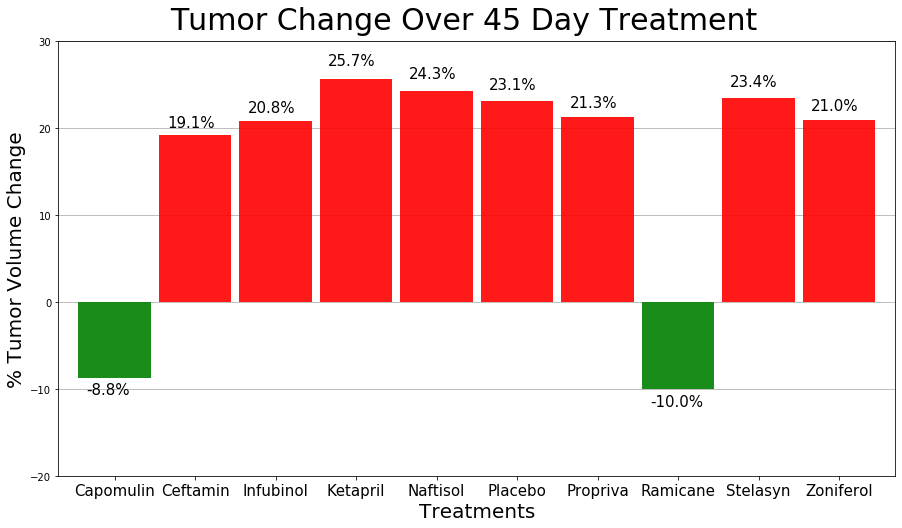

In [251]:
fig, ax = plt.subplots(1, 1)

ax = percent_change_df.plot(kind="bar", align='center', alpha=0.9, 
                                    color=['green','red','red','red','red','red','red','green','red','red'],
                                    figsize=(15,8), zorder=6, width=0.9)

plt.figtext(.5, .9, 'Tumor Change Over 45 Day Treatment', fontsize=30, ha='center')
plt.ylabel('% Tumor Volume Change', fontsize=20)
plt.ylim(-20, 30)
plt.xlabel('Treatments',fontsize=20)
plt.xticks(rotation='horizontal', fontsize=15)
ax.grid(True, axis='y', zorder=2)


##################################################################################################
#Modified from:  https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height()*1.1 -1, str(round(i.get_height(),1)) +'%', fontsize=15,
                color='black')

###################################################################################################
    
#Save to file
plt.savefig('tumor_change_bar_plot.jpeg')